# Regression MCQ Webinar

We will walk through most of the coding skills your will need to tackle the Regression MCQ.

## Learning Objective

By the end of this notebook, you should be:

* Confident enough to attempt the Regression MCQ

## Tips and Tricks

* This MCQ is quite lengthy, **ensure you start early**
* You will need the following files in the same folder as your notebook;
  * data_ingestion.py
  * field_data_processor.py
  * validate_data.py
  * Maji_Ndogo_farm_survey_small.db
* You can download the above files **from the MCQ notebook** OR
* Get them from **8_Decision Trees section** of the course.
* Ensure you **read the instructions properly.**
* If you are confused or do not understand an instruction, **copy and paste in a chatbot to help explain** .
* Become comfortable with errors and error handling.
* When you need to write a code but you do not know how to write it, write what you want to achieve with that code in clear English and ask a chat bot to show you a sample code of what you want to do, then adjust the code as desired.



In [ ]:
import numpy as np
import pandas as pd
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
import statsmodels.graphics.correlation as sgc
from statsmodels.graphics.gofplots import qqplot
import statsmodels.stats.api as sms
from statsmodels.stats.outliers_influence import OLSInfluence
import seaborn as sns

## The Data

For this walk-through we will be working with the Housing Price Dataset.

The dependent  variable (target variable)is the **price**

In [ ]:
# Import the data
df = pd.read_csv('https://raw.githubusercontent.com/Explore-AI/Public-Data/master/Data/Housing_Price_Data.csv')
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


## Section 1: Understanding our variables

In this section we will analyse the predictor variables in our dataset and how they relate to the target variable.

**How many predictors do we originally have in our dataset, and which of these are categorical in nature?**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [ ]:
df.shape

(545, 13)

In [ ]:
len(df.columns) - 1

12

In [ ]:
df.select_dtypes(include=['object'])

,mainroad,guestroom,basement,hotwaterheating,airconditioning,prefarea,furnishingstatus
0,yes,no,no,no,yes,yes,furnished
1,yes,no,no,no,yes,no,furnished
2,yes,no,yes,no,no,yes,semi-furnished
3,yes,no,yes,no,yes,yes,furnished
4,yes,yes,yes,no,yes,no,furnished
...,...,...,...,...,...,...,...
540,yes,no,yes,no,no,no,unfurnished
541,no,no,no,no,no,no,semi-furnished
542,yes,no,no,no,no,no,unfurnished
543,no,no,no,no,no,no,furnished


In [ ]:
df.select_dtypes(include=['object']).columns

Index(['mainroad', 'guestroom', 'basement', 'hotwaterheating',
       'airconditioning', 'prefarea', 'furnishingstatus'],
      dtype='object')

**The categorical features in our dataset need to be converted into a format suitable for modeling. After applying dummy variable encoding to these categorical features, how many independent variables do we now have?**

*Note: Set the drop_first parameter to True.*

In [ ]:
encoded_df = pd.get_dummies(df, columns=["mainroad", "guestroom", "basement", "hotwaterheating", "airconditioning", "prefarea", "furnishingstatus"])
encoded_df.head()

,price,area,bedrooms,bathrooms,stories,parking,mainroad_no,mainroad_yes,guestroom_no,guestroom_yes,...,basement_yes,hotwaterheating_no,hotwaterheating_yes,airconditioning_no,airconditioning_yes,prefarea_no,prefarea_yes,furnishingstatus_furnished,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
0,13300000,7420,4,2,3,2,False,True,True,False,...,False,True,False,False,True,False,True,True,False,False
1,12250000,8960,4,4,4,3,False,True,True,False,...,False,True,False,False,True,True,False,True,False,False
2,12250000,9960,3,2,2,2,False,True,True,False,...,True,True,False,True,False,False,True,False,True,False
3,12215000,7500,4,2,2,3,False,True,True,False,...,True,True,False,False,True,False,True,True,False,False
4,11410000,7420,4,1,2,2,False,True,False,True,...,True,True,False,False,True,True,False,True,False,False


In [ ]:
encoded_df.shape[1]

21

In [ ]:
len(encoded_df.columns) - 1

20

In most cases, when fitting a model with sms.OLS(), it's essential to ensure that all features are numeric. If boolean columns are present, they should be explicitly converted to numeric types before fitting the model.

**Convert all boolean columns to numeric type**

In [ ]:
encoded_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 21 columns):
 #   Column                           Non-Null Count  Dtype
---  ------                           --------------  -----
 0   price                            545 non-null    int64
 1   area                             545 non-null    int64
 2   bedrooms                         545 non-null    int64
 3   bathrooms                        545 non-null    int64
 4   stories                          545 non-null    int64
 5   parking                          545 non-null    int64
 6   mainroad_no                      545 non-null    bool 
 7   mainroad_yes                     545 non-null    bool 
 8   guestroom_no                     545 non-null    bool 
 9   guestroom_yes                    545 non-null    bool 
 10  basement_no                      545 non-null    bool 
 11  basement_yes                     545 non-null    bool 
 12  hotwaterheating_no               545 non-null    b

In [ ]:
# Convert boolean columns to integer type
bool_columns = encoded_df.select_dtypes(include=[bool]).columns
encoded_df[bool_columns] = encoded_df[bool_columns].astype(int)



In [ ]:
bool_columns = encoded_df.select_dtypes(include=[bool]).columns
bool_columns

Index(['mainroad_no', 'mainroad_yes', 'guestroom_no', 'guestroom_yes',
       'basement_no', 'basement_yes', 'hotwaterheating_no',
       'hotwaterheating_yes', 'airconditioning_no', 'airconditioning_yes',
       'prefarea_no', 'prefarea_yes', 'furnishingstatus_furnished',
       'furnishingstatus_semi-furnished', 'furnishingstatus_unfurnished'],
      dtype='object')

In [ ]:
encoded_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 21 columns):
 #   Column                           Non-Null Count  Dtype
---  ------                           --------------  -----
 0   price                            545 non-null    int64
 1   area                             545 non-null    int64
 2   bedrooms                         545 non-null    int64
 3   bathrooms                        545 non-null    int64
 4   stories                          545 non-null    int64
 5   parking                          545 non-null    int64
 6   mainroad_no                      545 non-null    int64
 7   mainroad_yes                     545 non-null    int64
 8   guestroom_no                     545 non-null    int64
 9   guestroom_yes                    545 non-null    int64
 10  basement_no                      545 non-null    int64
 11  basement_yes                     545 non-null    int64
 12  hotwaterheating_no               545 non-null    i

In [ ]:
encoded_df

,price,area,bedrooms,bathrooms,stories,parking,mainroad_no,mainroad_yes,guestroom_no,guestroom_yes,...,basement_yes,hotwaterheating_no,hotwaterheating_yes,airconditioning_no,airconditioning_yes,prefarea_no,prefarea_yes,furnishingstatus_furnished,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
0,13300000,7420,4,2,3,2,0,1,1,0,...,0,1,0,0,1,0,1,1,0,0
1,12250000,8960,4,4,4,3,0,1,1,0,...,0,1,0,0,1,1,0,1,0,0
2,12250000,9960,3,2,2,2,0,1,1,0,...,1,1,0,1,0,0,1,0,1,0
3,12215000,7500,4,2,2,3,0,1,1,0,...,1,1,0,0,1,0,1,1,0,0
4,11410000,7420,4,1,2,2,0,1,0,1,...,1,1,0,0,1,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,2,0,1,1,0,...,1,1,0,1,0,1,0,0,0,1
541,1767150,2400,3,1,1,0,1,0,1,0,...,0,1,0,1,0,1,0,0,1,0
542,1750000,3620,2,1,1,0,0,1,1,0,...,0,1,0,1,0,1,0,0,0,1
543,1750000,2910,3,1,1,0,1,0,1,0,...,0,1,0,1,0,1,0,1,0,0


**From our encoded dataset, which variable has the highest absolute correlation with the *price*, excluding the variable itself?**

In [ ]:
correlation_matrix = encoded_df.corr()
correlations = correlation_matrix['price'].drop('price')
sorted_correlations = correlations.abs().sort_values(ascending=False)
sorted_correlations

area                               0.535997
bathrooms                          0.517545
airconditioning_no                 0.452954
airconditioning_yes                0.452954
stories                            0.420712
parking                            0.384394
bedrooms                           0.366494
prefarea_no                        0.329777
prefarea_yes                       0.329777
mainroad_no                        0.296898
mainroad_yes                       0.296898
furnishingstatus_unfurnished       0.280587
guestroom_yes                      0.255517
guestroom_no                       0.255517
furnishingstatus_furnished         0.229350
basement_no                        0.187057
basement_yes                       0.187057
hotwaterheating_yes                0.093073
hotwaterheating_no                 0.093073
furnishingstatus_semi-furnished    0.063656
Name: price, dtype: float64

**Suppose we wish to determine which of the predictors in our dataset are statistically significant. We will follow the following steps:**

* Fit a statsmodels regression model to predict `Standard_yield` using our encoded dataset.
* Extract p-values for each predictor from the fitted model to find the ones that are significant based on a given threshold.

**Which of the following variables do we find to be statistically significant for predicting `Standard_yield`, based on a p-value threshold of 0.05 `(p-value < 0.05)`?**


In [ ]:
import statsmodels.api as sms

X = encoded_df.drop(columns="price")
y = encoded_df["price"]
# Fit a regression model
model = sms.OLS(y, X).fit()

# Extract p-values for each predictor
p_values = model.pvalues

# Filter significant predictors based on the p-value threshold (0.05)
significant_predictors = p_values[p_values < 0.05]

# Print the statistically significant predictors
print("Statistically significant predictors:")
significant_predictors.sort_values(ascending=False)

Statistically significant predictors:


airconditioning_no                 9.671181e-04
furnishingstatus_semi-furnished    9.520820e-05
furnishingstatus_furnished         9.388120e-05
guestroom_yes                      3.755856e-06
parking                            2.817182e-06
hotwaterheating_yes                9.511332e-07
mainroad_yes                       5.916908e-09
basement_yes                       1.750983e-09
stories                            6.547634e-12
prefarea_yes                       1.273274e-12
airconditioning_yes                2.598078e-17
bathrooms                          4.527066e-20
area                               7.068685e-22
dtype: float64

## Section 2: Generating a multiple linear regression model

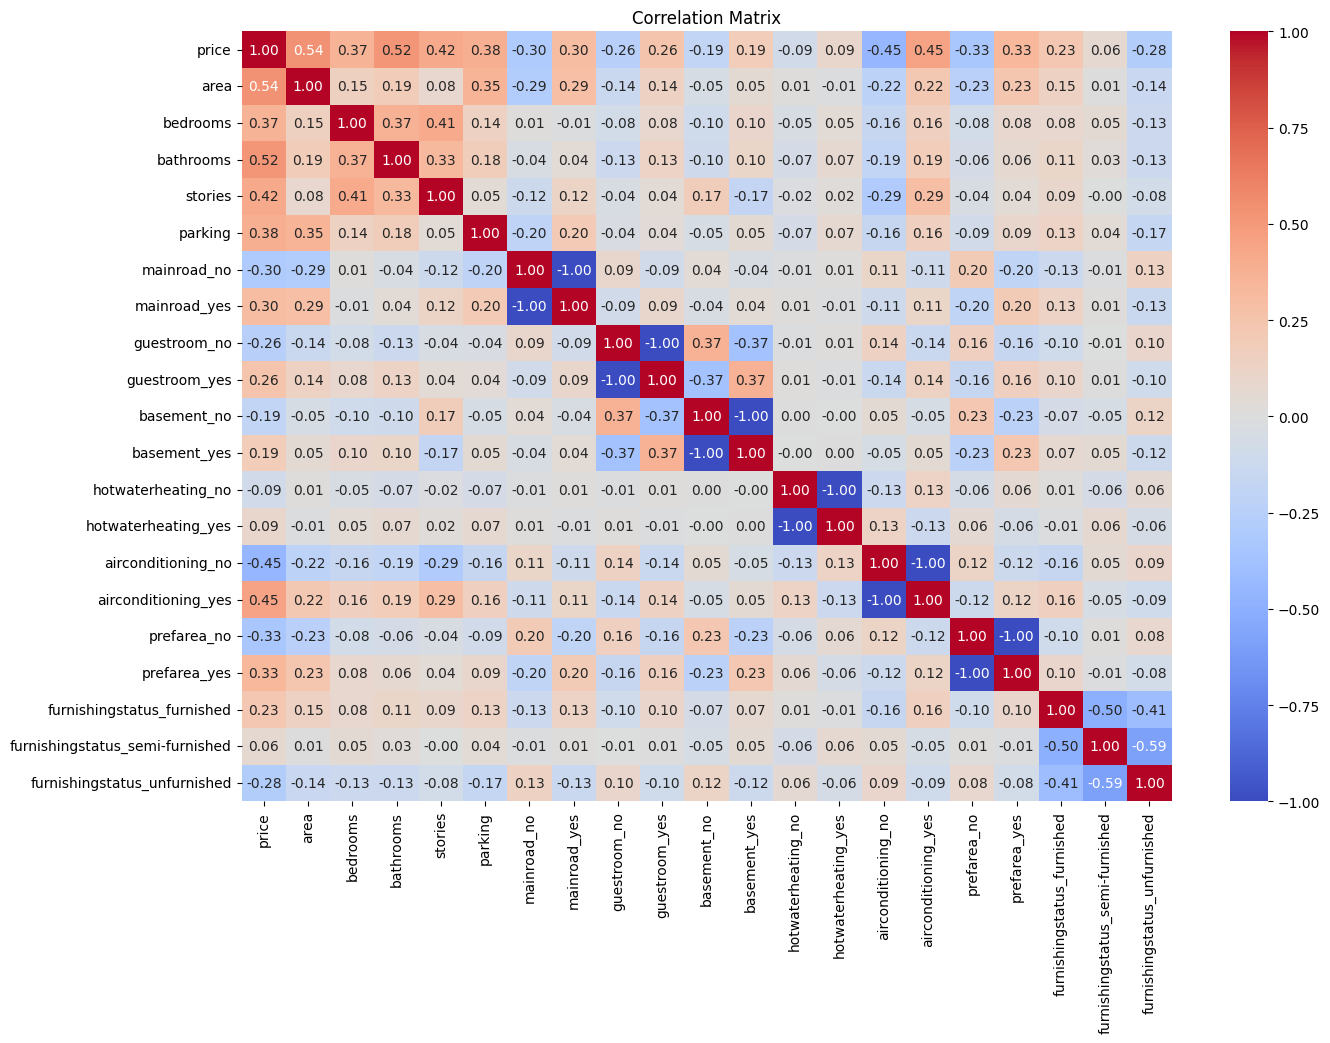

In [ ]:
# Create a correlation matrix
correlation_matrix = encoded_df.corr()

# Plot heatmap for the entire correlation matrix
plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

In [ ]:
correlation_matrix

,price,area,bedrooms,bathrooms,stories,parking,mainroad_no,mainroad_yes,guestroom_no,guestroom_yes,...,basement_yes,hotwaterheating_no,hotwaterheating_yes,airconditioning_no,airconditioning_yes,prefarea_no,prefarea_yes,furnishingstatus_furnished,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
price,1.000000,0.535997,0.366494,0.517545,0.420712,0.384394,-0.296898,0.296898,-0.255517,0.255517,...,0.187057,-0.093073,0.093073,-0.452954,0.452954,-0.329777,0.329777,0.229350,0.063656,-0.280587
area,0.535997,1.000000,0.151858,0.193820,0.083996,0.352980,-0.288874,0.288874,-0.140297,0.140297,...,0.047417,0.009229,-0.009229,-0.222393,0.222393,-0.234779,0.234779,0.145772,0.006156,-0.142278
bedrooms,0.366494,0.151858,1.000000,0.373930,0.408564,0.139270,0.012033,-0.012033,-0.080549,0.080549,...,0.097312,-0.046049,0.046049,-0.160603,0.160603,-0.079023,0.079023,0.079054,0.050040,-0.126252
bathrooms,0.517545,0.193820,0.373930,1.000000,0.326165,0.177496,-0.042398,0.042398,-0.126469,0.126469,...,0.102106,-0.067159,0.067159,-0.186915,0.186915,-0.063472,0.063472,0.108139,0.029834,-0.132107
stories,0.420712,0.083996,0.408564,0.326165,1.000000,0.045547,-0.121706,0.121706,-0.043538,0.043538,...,-0.172394,-0.018847,0.018847,-0.293602,0.293602,-0.044425,0.044425,0.093176,-0.003648,-0.082972
parking,0.384394,0.352980,0.139270,0.177496,0.045547,1.000000,-0.204433,0.204433,-0.037466,0.037466,...,0.051497,-0.067864,0.067864,-0.159173,0.159173,-0.091627,0.091627,0.131234,0.041327,-0.165705
mainroad_no,-0.296898,-0.288874,0.012033,-0.042398,-0.121706,-0.204433,1.000000,-1.000000,0.092337,-0.092337,...,-0.044002,-0.011781,0.011781,0.105423,-0.105423,0.199876,-0.199876,-0.129971,-0.011450,0.133123
mainroad_yes,0.296898,0.288874,-0.012033,0.042398,0.121706,0.204433,-1.000000,1.000000,-0.092337,0.092337,...,0.044002,0.011781,-0.011781,-0.105423,0.105423,-0.199876,0.199876,0.129971,0.011450,-0.133123
guestroom_no,-0.255517,-0.140297,-0.080549,-0.126469,-0.043538,-0.037466,0.092337,-0.092337,1.000000,-1.000000,...,-0.372066,-0.010308,0.010308,0.138179,-0.138179,0.160897,-0.160897,-0.099721,-0.005821,0.099023
guestroom_yes,0.255517,0.140297,0.080549,0.126469,0.043538,0.037466,-0.092337,0.092337,-1.000000,1.000000,...,0.372066,0.010308,-0.010308,-0.138179,0.138179,-0.160897,0.160897,0.099721,0.005821,-0.099023


In [ ]:
specific_correlations = correlation_matrix.loc[["area", "bathrooms", "parking"],
                                               ["bedrooms", "stories", "mainroad_no"]]

specific_correlations

,bedrooms,stories,mainroad_no
area,0.151858,0.083996,-0.288874
bathrooms,0.373930,0.326165,-0.042398
parking,0.139270,0.045547,-0.204433


**Now that we have analysed our variables, let's fit an ordinary least squares regression model using statsmodels.formula.api and then print the model summary.**

In [ ]:
# # Your code here
# independent_cols = encoded_df.drop(columns=["price"]).columns

# dependent_var = 'price'


# # Generating the regression string
# formula_str = dependent_var+ ' ~ ' + ' + '.join(independent_cols)
# formula_str
# # Construct and fit the model
# model = smf.ols(formula_str, data=encoded_df)
# model = model.fit()

# #Print the model summary
# print(model.summary())

In [ ]:
model

**Let's evaluate our model's results. Generate a scatter plot of the residuals against the fitted values allowing us to visually inspect whether the residuals have constant variance and are distributed randomly around the zero residual line.**

**What does the scatter plot tell us?**

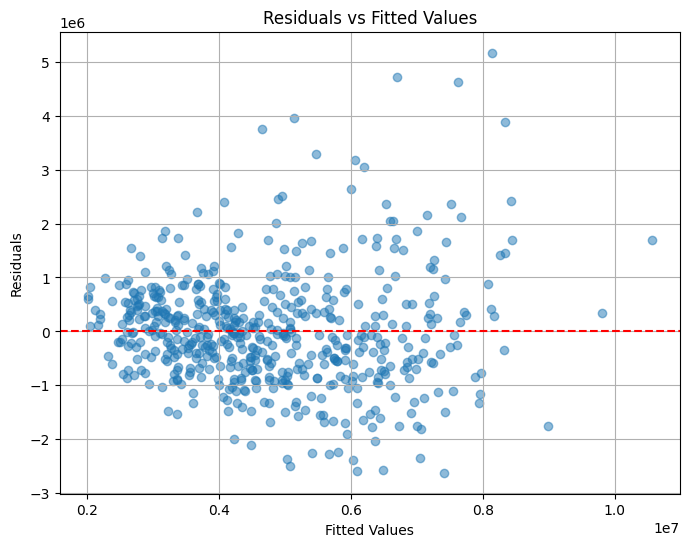

In [ ]:
# Get the fitted values
fitted_values = model.fittedvalues

# Calculate residuals
residuals = model.resid

# Create scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(fitted_values, residuals, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--')  # Add a horizontal line at y=0
plt.title('Residuals vs Fitted Values')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.grid(True)
plt.show()

## Section 3: Making a prediction using decision trees

Train a decision tree with the following specifications:
* Split the data into training and testing data.
* Use the DecisionTreeRegressor to fit a model using a max_depth' of 2 and a random_state` of 42.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor


X = encoded_df.drop(['price'], axis=1)
y = encoded_df['price']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize DecisionTreeRegressor with max_depth=2
dt_regressor = DecisionTreeRegressor(max_depth=2, random_state=42)

# Fit the model on the training data
dt_regressor.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=2, random_state=42)

In [ ]:
encoded_df.shape

(545, 21)

**Using the trained Decision Tree Regressor model, make a prediction for y given the following x-values:**

**[6600, 3, 2, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1]**

In [ ]:
# Given x-values
x_values = [[6600, 3, 2, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1]]
x_values = pd.DataFrame(x_values, columns=X.columns)

# Make prediction
predicted_y = dt_regressor.predict(x_values)
predicted_y

array([7242335.17241379])

In [ ]:
x_values

,area,bedrooms,bathrooms,stories,parking,mainroad_no,mainroad_yes,guestroom_no,guestroom_yes,basement_no,basement_yes,hotwaterheating_no,hotwaterheating_yes,airconditioning_no,airconditioning_yes,prefarea_no,prefarea_yes,furnishingstatus_furnished,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
0,6600,3,2,1,0,0,1,1,0,0,1,1,0,0,1,0,1,0,0,1


In [ ]:
X_train

,area,bedrooms,bathrooms,stories,parking,mainroad_no,mainroad_yes,guestroom_no,guestroom_yes,basement_no,basement_yes,hotwaterheating_no,hotwaterheating_yes,airconditioning_no,airconditioning_yes,prefarea_no,prefarea_yes,furnishingstatus_furnished,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
46,6000,3,2,4,1,0,1,1,0,1,0,1,0,0,1,1,0,1,0,0
93,7200,3,2,1,3,0,1,1,0,0,1,1,0,0,1,1,0,0,1,0
335,3816,2,1,1,2,0,1,1,0,0,1,1,0,0,1,1,0,1,0,0
412,2610,3,1,2,0,0,1,1,0,0,1,1,0,1,0,0,1,0,0,1
471,3750,3,1,2,0,0,1,1,0,1,0,1,0,1,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,6000,4,2,4,0,0,1,1,0,1,0,1,0,0,1,1,0,0,0,1
106,5450,4,2,1,0,0,1,1,0,0,1,1,0,0,1,0,1,0,1,0
270,4500,3,2,3,1,0,1,1,0,1,0,0,1,1,0,1,0,1,0,0
435,4040,2,1,1,0,0,1,1,0,1,0,1,0,1,0,1,0,0,0,1


**Based on the model above, what is the value of our RMSE?**

In [ ]:
from sklearn.metrics import mean_squared_error
import numpy as np

# Make predictions on the test set
y_pred = dt_regressor.predict(X_test)

# Calculate RMSE
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
rmse

1783333.6469583262

**Let's attempt to enhance our model's performance by setting the max_depth hyperparameter to 5.**

In [ ]:
# Initialize DecisionTreeRegressor with max_depth=2
dt_regressor = DecisionTreeRegressor(max_depth=5, random_state=42)

# Fit the model on the training data
dt_regressor.fit(X_train, y_train)

# Make predictions on the test set
y_pred = dt_regressor.predict(X_test)

# Calculate RMSE
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
rmse

1616965.3958061757

## Section 4 RandomForest

Train a decision tree with the following specifications:


* Separate the features `X` and target `y` dataframes
* Split the data into training and testing sets - use a test size of `20%` and a random state of `42` for reproducibility
* Fit the model to the training data
* Make predictions on the testing set
* calculate the R-squared score, and the Mean Squared Error (MSE) of the test set predictions.

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error

X = encoded_df.drop(columns="price")
y = encoded_df["price"]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Instanciate a random forest with
rf_model = RandomForestRegressor(max_depth=15, random_state=42)

# Fit the model to the training data
rf_model.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = rf_model.predict(X_test)

# Calculate R-squared score
r_squared = r2_score(y_test, y_pred)

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)

print(r_squared)
print(mse)

0.6077461168681646
1982674806697.2432


**Identify which features the model considers most significant in predicting the target variable.**

In [ ]:
# Extract feature importances
feature_importances = rf_model.feature_importances_
feature_importances

array([0.4653285 , 0.04631856, 0.15138121, 0.05472659, 0.0544414 ,
       0.00482501, 0.00560419, 0.00741674, 0.00851381, 0.01571015,
       0.01799186, 0.00840092, 0.01011339, 0.03532646, 0.02833518,
       0.01507526, 0.01604457, 0.01042244, 0.01046413, 0.03355962])

In [ ]:
# Get feature names
X.columns

Index(['area', 'bedrooms', 'bathrooms', 'stories', 'parking', 'mainroad_no',
       'mainroad_yes', 'guestroom_no', 'guestroom_yes', 'basement_no',
       'basement_yes', 'hotwaterheating_no', 'hotwaterheating_yes',
       'airconditioning_no', 'airconditioning_yes', 'prefarea_no',
       'prefarea_yes', 'furnishingstatus_furnished',
       'furnishingstatus_semi-furnished', 'furnishingstatus_unfurnished'],
      dtype='object')

In [ ]:
top_features = pd.Series(data=feature_importances, index=X.columns).sort_values(ascending=False)
top_features

area                               0.465329
bathrooms                          0.151381
stories                            0.054727
parking                            0.054441
bedrooms                           0.046319
airconditioning_no                 0.035326
furnishingstatus_unfurnished       0.033560
airconditioning_yes                0.028335
basement_yes                       0.017992
prefarea_yes                       0.016045
basement_no                        0.015710
prefarea_no                        0.015075
furnishingstatus_semi-furnished    0.010464
furnishingstatus_furnished         0.010422
hotwaterheating_yes                0.010113
guestroom_yes                      0.008514
hotwaterheating_no                 0.008401
guestroom_no                       0.007417
mainroad_yes                       0.005604
mainroad_no                        0.004825
dtype: float64

<Axes: >

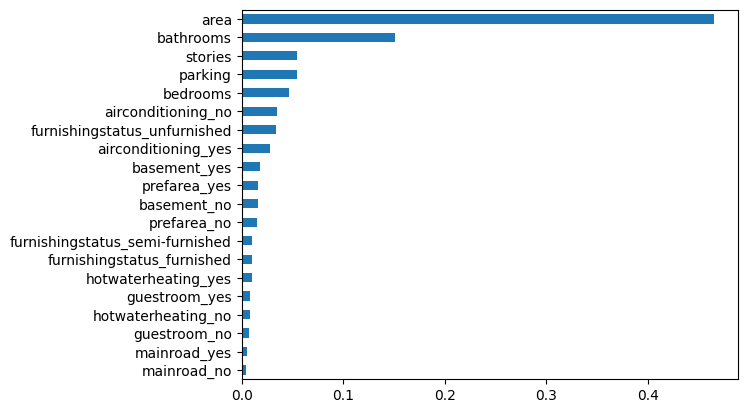

In [ ]:
top_features.plot(kind="barh")